In [1]:
from glob import glob
from pathlib import Path
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Output from Payton's software
# data = pickle.load(open("./chem_data/test_run_SO2_OH_on.pkl", mode="rb"))

In [3]:
# data.keys()

In [4]:
# for k in ['H2SO4', 'O1D', 'O3', 'OH', 'SO2', 'BISULFATE (aq)', 'H2O (aq)', 'H2SO4 (aq)', 'N', 'pH', 'POM (aq)', 'SULFATE (aq)', 'Ddry', 'Dp', 'kappa']:
#     print(k, data[k].max())

In [5]:
# Need to be of shape (timesteps, number_of_particles)
# h2so4 = np.tile(data['H2SO4'], (1000,1)).transpose()
# so2 = np.tile(data['SO2'], (1000,1)).transpose()
# oh = np.tile(data['OH'], (1000,1)).transpose()

In [6]:
# Make the appropriate txt files needed for input
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/aero_number_0001.txt", data['N'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/POM_0001.txt", data['POM (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/H2O_0001.txt", data['H2O (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/H2SO4_0001.txt", h2so4)
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/SO2_0001.txt", so2)
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/OH_0001.txt", oh)
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/SO4_0001.txt", data['SULFATE (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/HSO4_0001.txt", data['BISULFATE (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/H2SO4a_0001.txt", data['H2SO4 (aq)'])

# Check Results

In [63]:
rollout_results = "./chem_data/proc_data_payton/"

In [64]:
rollout_data = {}
for dir in os.listdir(rollout_results):
    if dir.startswith("."):  
        print(f"Skipping {dir}")
        continue

    path = rollout_results + dir
    rollout_data[dir] = ar.load_rollout_data(path)

Skipping .ipynb_checkpoints


In [65]:
ro = rollout_data['ex10']['rollout_ex00_dict.pkl']

In [66]:
true_x = ro['true_x']
pred_x = ro['pred_x']
mat_prop = ro['mat_prop']

In [67]:
true_x.keys()

dict_keys(['H2O', 'H2SO4a', 'HSO4', 'SO4', 'SO2', 'OH', 'H2SO4'])

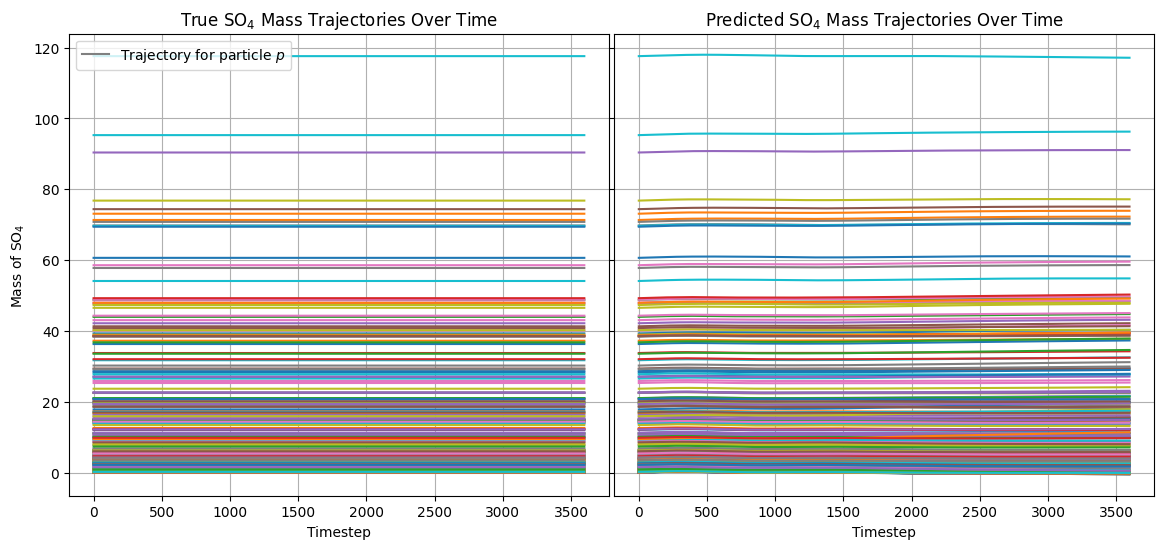

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['SO4'])
ax2.plot(pred_x['SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of SO$_4$')

ax1.set_title('True SO$_4$ Mass Trajectories Over Time')
ax2.set_title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.show()

In [71]:
ar.nmae(true_x['SO4'], pred_x['SO4'])

0.6007151521385644

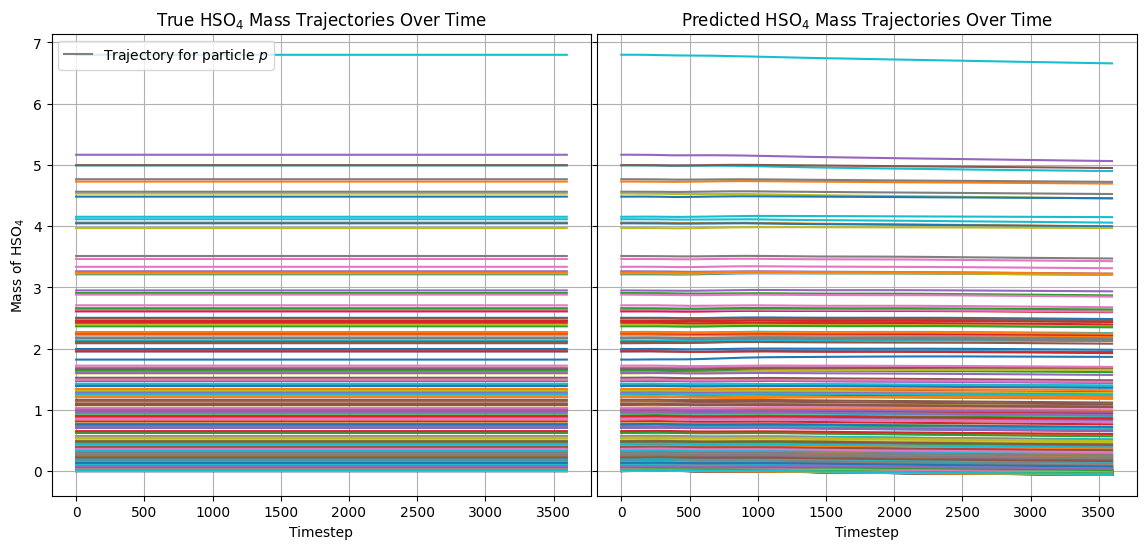

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['HSO4'])
ax2.plot(pred_x['HSO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of HSO$_4$')

ax1.set_title('True HSO$_4$ Mass Trajectories Over Time')
ax2.set_title('Predicted HSO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.show()

In [103]:
ar.nmae(true_x['HSO4'], pred_x['HSO4'])

1.1136458286929471

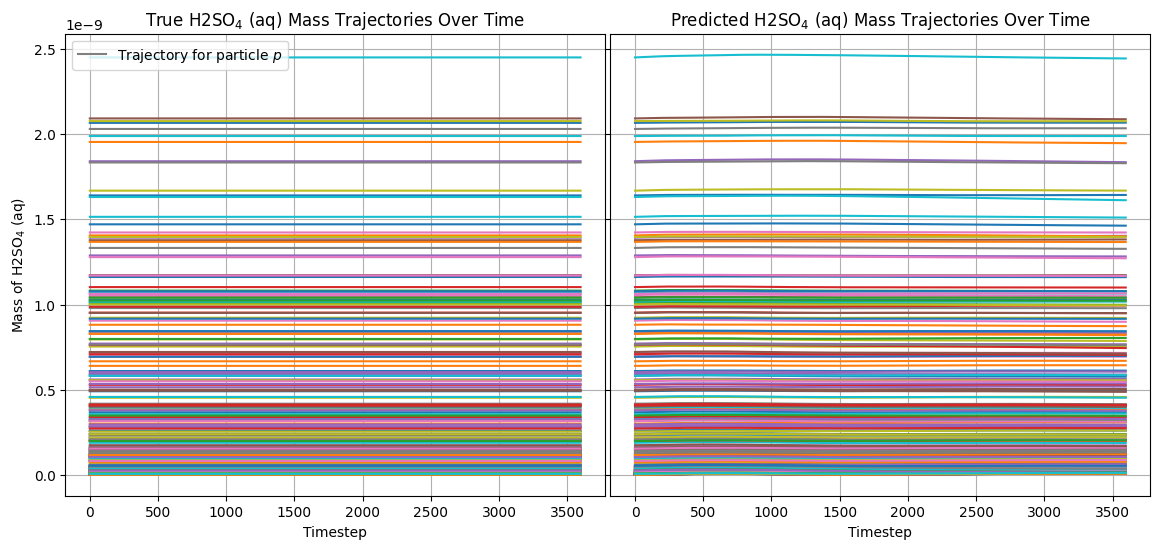

In [104]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2SO4a'])
ax2.plot(pred_x['H2SO4a'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of H2SO$_4$ (aq)')

ax1.set_title('True H2SO$_4$ (aq) Mass Trajectories Over Time')
ax2.set_title('Predicted H2SO$_4$ (aq) Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.show()

In [105]:
ar.nmae(true_x['H2SO4a'], pred_x['H2SO4a'])

0.2966680208844511

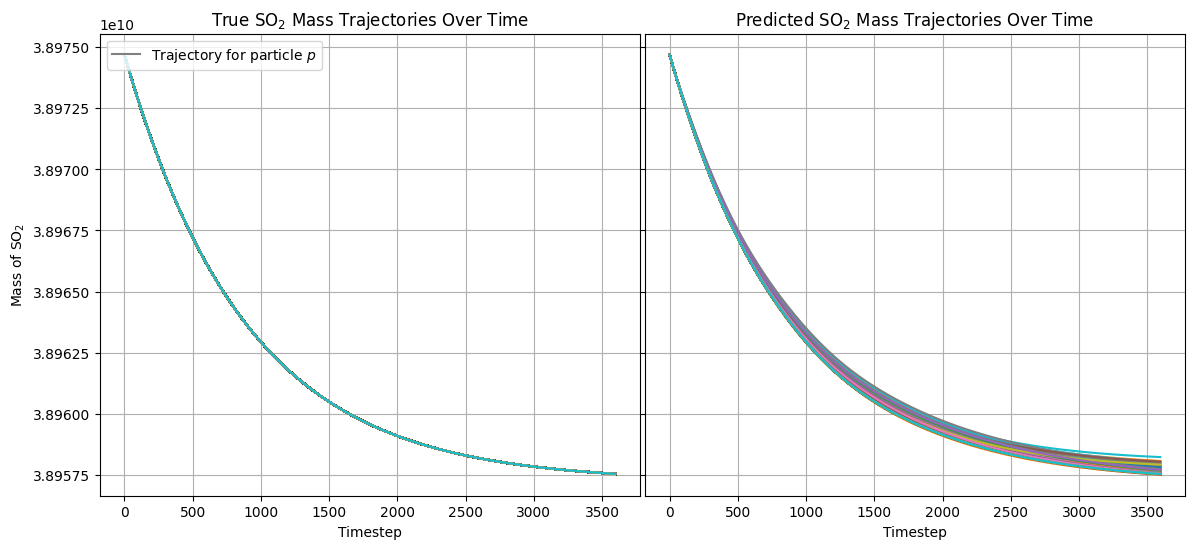

In [106]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['SO2'])
ax2.plot(pred_x['SO2'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of SO$_2$')

ax1.set_title('True SO$_2$ Mass Trajectories Over Time')
ax2.set_title('Predicted SO$_2$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.show()

In [107]:
ar.nmae(true_x['SO2'], pred_x['SO2'])

1.960023041958071e-06

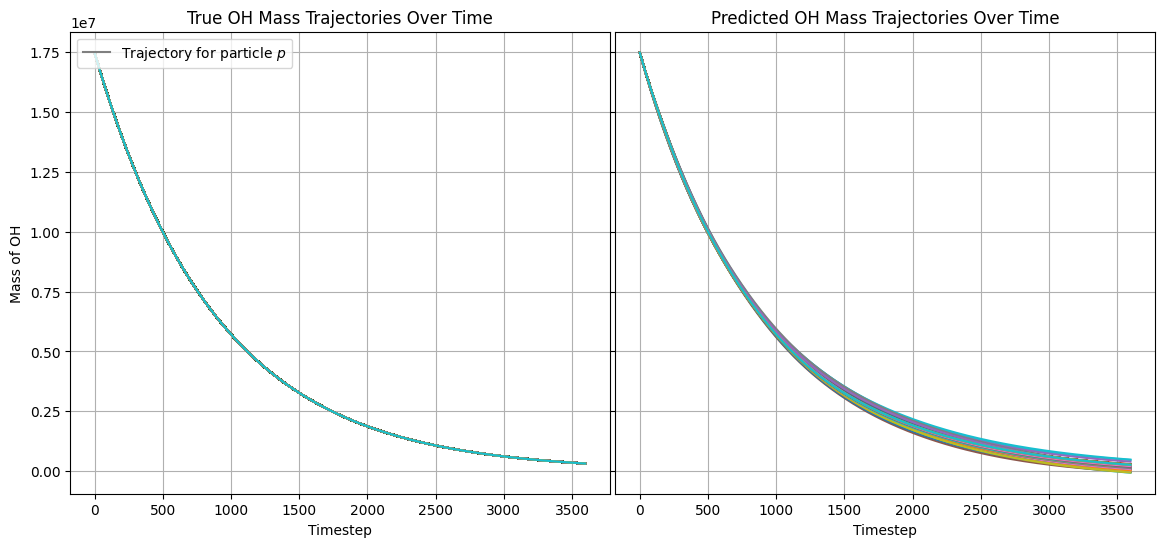

In [108]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['OH'])
ax2.plot(pred_x['OH'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of OH')

ax1.set_title('True OH Mass Trajectories Over Time')
ax2.set_title('Predicted OH Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.show()

In [109]:
ar.nmae(true_x['OH'], pred_x['OH'])

0.04368913975579407

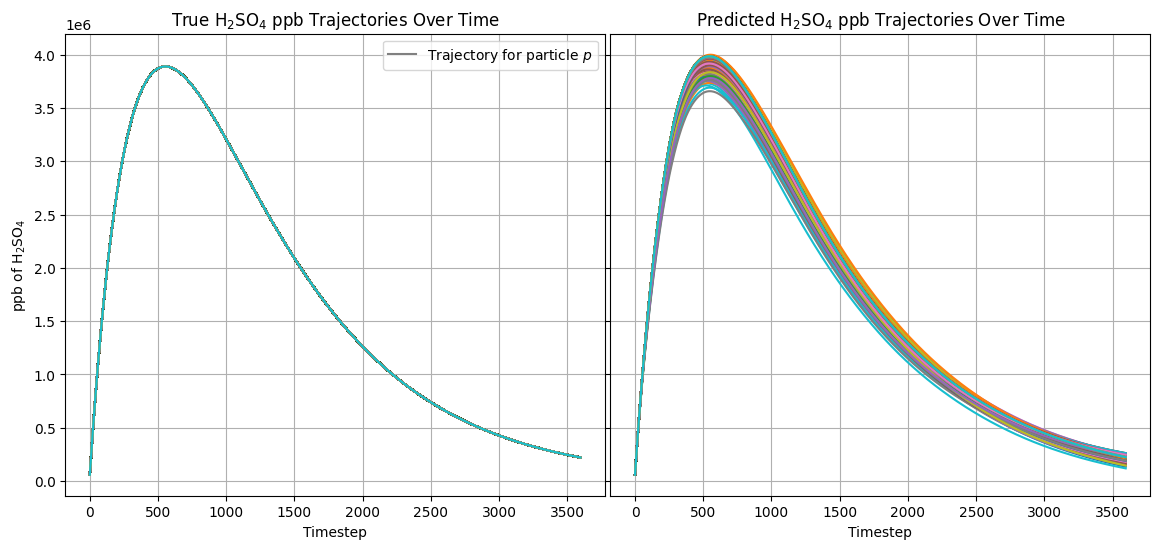

In [110]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2SO4'])
ax2.plot(pred_x['H2SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('ppb of H$_2$SO$_4$')

ax1.set_title('True H$_2$SO$_4$ ppb Trajectories Over Time')
ax2.set_title('Predicted H$_2$SO$_4$ ppb Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper right', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.show()

In [111]:
ar.nmae(true_x['H2SO4'], pred_x['H2SO4'])

0.028008798922382172

In [112]:
true_dry_mass = {'POM': mat_prop['POM'], 'SO4': true_x['SO4']}

In [113]:
pred_dry_mass = {'POM': mat_prop['POM'], 'SO4': pred_x['SO4']}

In [114]:
so4_diam = ar.gd_from_vol(ar.volume('SO4', true_dry_mass))

In [115]:
pred_so4_diam = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass))

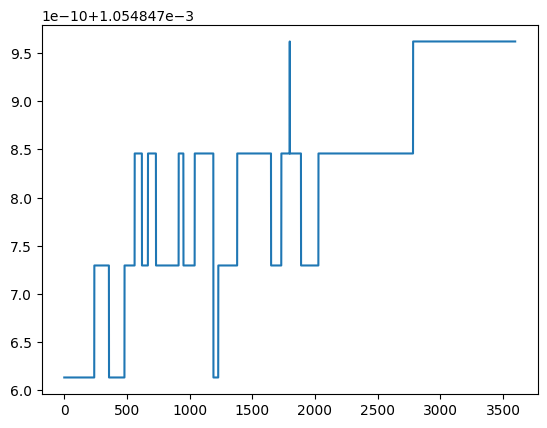

In [116]:
plt.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))

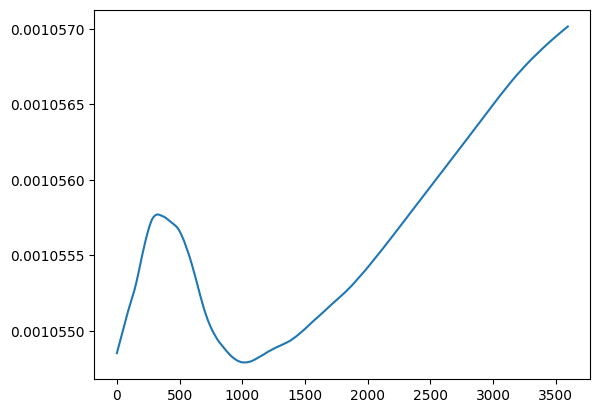

In [117]:
plt.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

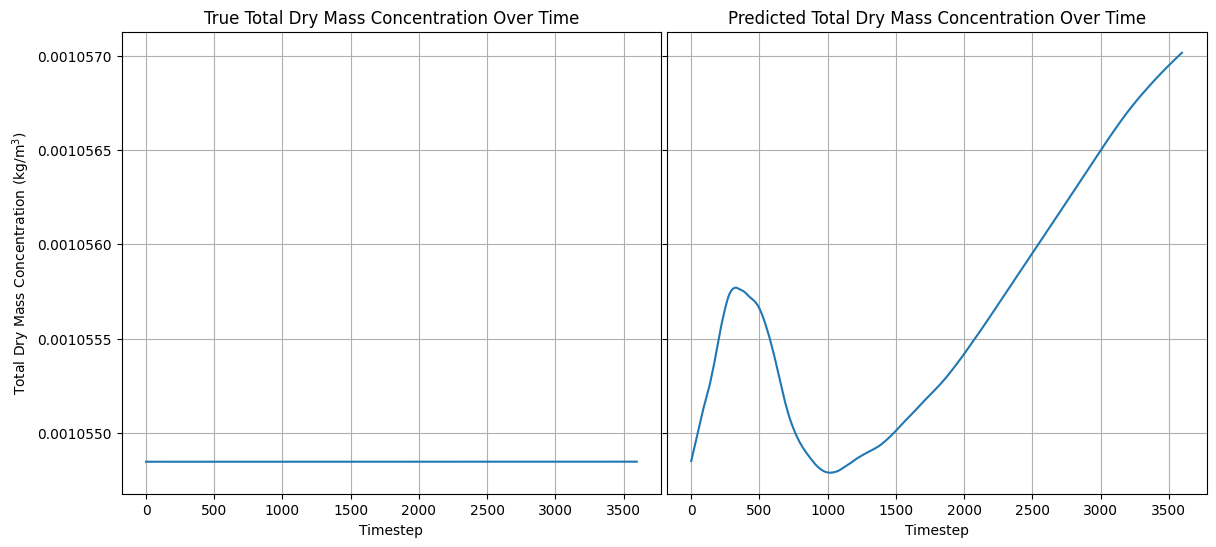

In [118]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))
ax2.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Total Dry Mass Concentration (kg/m$^3$)')

ax1.set_title('True Total Dry Mass Concentration Over Time')
ax2.set_title('Predicted Total Dry Mass Concentration Over Time')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("dm_conc_rep15.png")

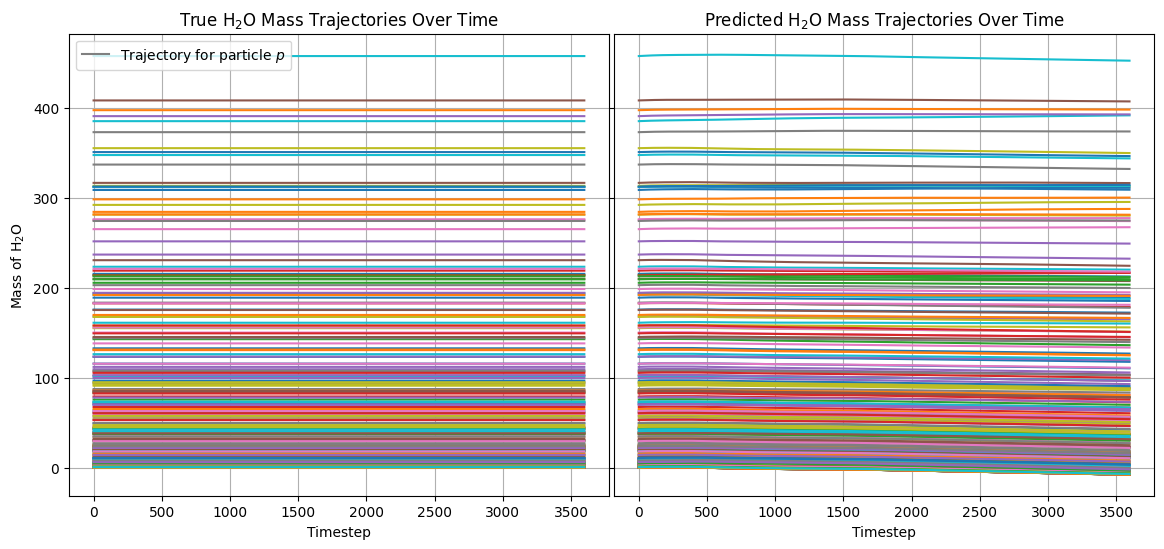

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2O'])
ax2.plot(pred_x['H2O'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of H$_2$O')

ax1.set_title('True H$_2$O Mass Trajectories Over Time')
ax2.set_title('Predicted H$_2$O Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2orep15.png")

In [120]:
ar.nmae(true_x['H2O'], pred_x['H2O'])

1.2401839595404982

In [121]:
total_true_drymass = sum(true_dry_mass.values())

In [122]:
total_pred_drymass = sum(pred_dry_mass.values())

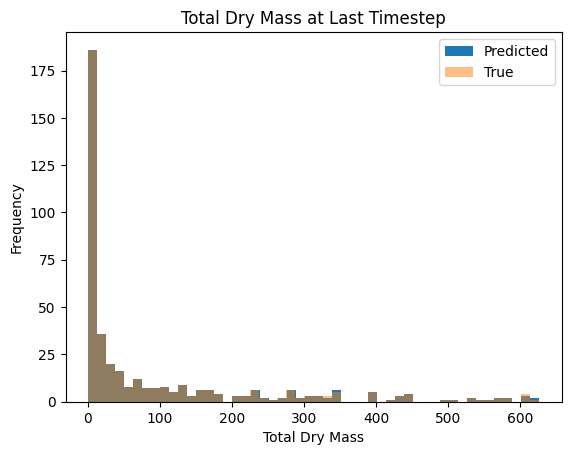

In [123]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50, label="Predicted")
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Total Dry Mass')
plt.ylabel('Frequency')
plt.title('Total Dry Mass at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dm_hist_rep15.png")

In [124]:
mat_prop['aero_number'].shape

(3598, 400)

In [125]:
dNdt = mat_prop['aero_number'][1:,:] - mat_prop['aero_number'][:-1,:]

In [126]:
true_Ddry = ar.gd_from_vol(ar.volume('SO4', true_dry_mass) + ar.volume('POM', true_dry_mass))

In [127]:
pred_Ddry = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass) + ar.volume('POM', true_dry_mass))

In [128]:
true_dDdrydt = true_Ddry[1:,:] - true_Ddry[:-1,:]

In [129]:
pred_dDdrydt = pred_Ddry[1:,:] - pred_Ddry[:-1,:]

/tmp/ipykernel_215392/838995858.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(dNdt / pred_dDdrydt)


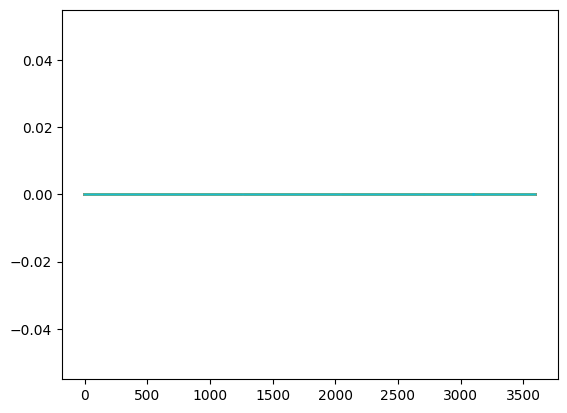

In [130]:
plt.plot(dNdt / pred_dDdrydt)
plt.show()

In [131]:
true_gmean, true_gstd = ar.mean_std_diameter(true_dry_mass)
pred_gmean, pred_gstd = ar.mean_std_diameter(pred_dry_mass)

In [132]:
diams = np.logspace(-9,-6, true_gmean.shape[0])

In [133]:
true_Ddry[-1,:].shape

(400,)

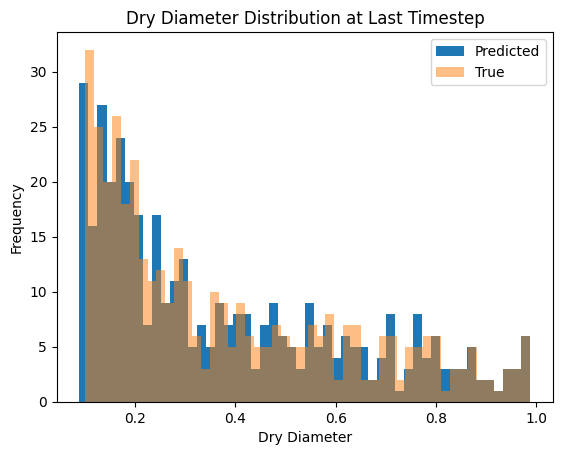

In [134]:
fig, ax = plt.subplots()
ax.hist(pred_Ddry[-1,:], bins=50, label="Predicted")
ax.hist(true_Ddry[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Dry Diameter')
plt.ylabel('Frequency')
plt.title('Dry Diameter Distribution at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dd_hist_rep15.png")